In [ ]:
#Importing the necessary libraries 
import pandas
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Loading the banknote dataset and displaying the first five rows
data=pandas.read_csv('BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
#Displays the last five rows
data.tail()

,variance,skewness,curtosis,entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
#Provides general information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


From the information provided, there are no null data, all the columns are complete with no missing value and then the data types are float and intergers and would require little or no preprocessing before being worked upon

In [ ]:
#Data Exploration, this groups the dataset by the target datapoint (Class)
Class = data.groupby('Class')
Class.mean()

,variance,skewness,curtosis,entropy
Class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


In [ ]:
data.describe()

,variance,skewness,curtosis,entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


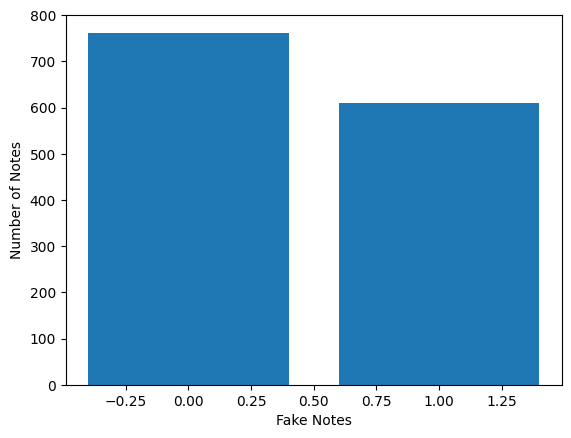

In [ ]:
Class_count = data.groupby('Class').count()
plt.bar(Class_count.index.values, Class_count['variance'])
plt.xlabel('Fake Notes')
plt.ylabel('Number of Notes')
plt.show()

From the above picture, we can see that the number of fake notes are actually high, almost same number as the original notes.

In [ ]:
data.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

This values above gives us explicitly, the number of fake notes as well as number of original notes, with 762 bank notes being original and 610 being fake bank notes. 

In [ ]:
#Splitting the dataset
X=data[['variance','skewness','curtosis','entropy']]
y=data['Class']

#Importing the train test split function 
from sklearn.model_selection import train_test_split

#Split the entire dataset into training and testing set 
#Splitting the train and test set in the ratio 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
#determine the number of input features
n_features = X.shape[1]

In [ ]:
#define model 
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))
#predict test set and convert to class label 
ypred = model.predict(X_test)
yhat = (ypred > 0.5).flatten().astype(int)

13/13 [==============================] - 0s 2ms/step


In [ ]:
#Evaluate predictions 
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)


Accuracy: 0.998


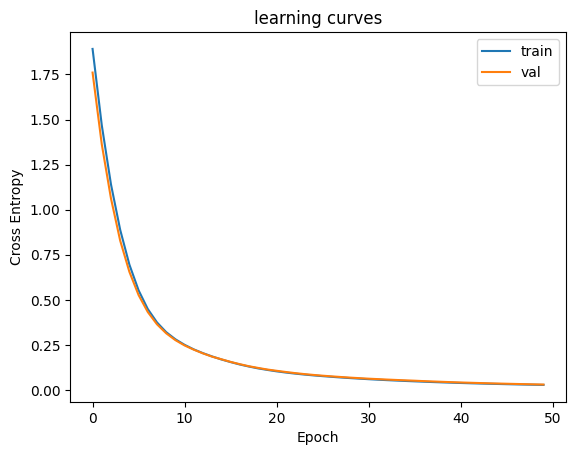

In [ ]:
#plotting the learning curves
pyplot.title('learning curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()